In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pnevmoniya/sample_solution.csv
/kaggle/input/pnevmoniya/test/test_img_10340.jpeg
/kaggle/input/pnevmoniya/test/test_img_10168.jpeg
/kaggle/input/pnevmoniya/test/test_img_10613.jpeg
/kaggle/input/pnevmoniya/test/test_img_10368.jpeg
/kaggle/input/pnevmoniya/test/test_img_10036.jpeg
/kaggle/input/pnevmoniya/test/test_img_10527.jpeg
/kaggle/input/pnevmoniya/test/test_img_10020.jpeg
/kaggle/input/pnevmoniya/test/test_img_10585.jpeg
/kaggle/input/pnevmoniya/test/test_img_10276.jpeg
/kaggle/input/pnevmoniya/test/test_img_10054.jpeg
/kaggle/input/pnevmoniya/test/test_img_10298.jpeg
/kaggle/input/pnevmoniya/test/test_img_10355.jpeg
/kaggle/input/pnevmoniya/test/test_img_10511.jpeg
/kaggle/input/pnevmoniya/test/test_img_10410.jpeg
/kaggle/input/pnevmoniya/test/test_img_10096.jpeg
/kaggle/input/pnevmoniya/test/test_img_10219.jpeg
/kaggle/input/pnevmoniya/test/test_img_10057.jpeg
/kaggle/input/pnevmoniya/test/test_img_10296.jpeg
/kaggle/input/pnevmoniya/test/test_img_10407.jpeg
/kagg

In [5]:
import cv2

epoch,train_loss,valid_loss,accuracy,time
0,0.948297,0.618399,0.818493,01:50


epoch,train_loss,valid_loss,accuracy,time
0,0.563482,0.553777,0.854452,01:59
1,0.443555,0.428982,0.863014,01:53
2,0.320440,0.382672,0.864726,01:54
3,0.252433,0.401646,0.868151,01:54


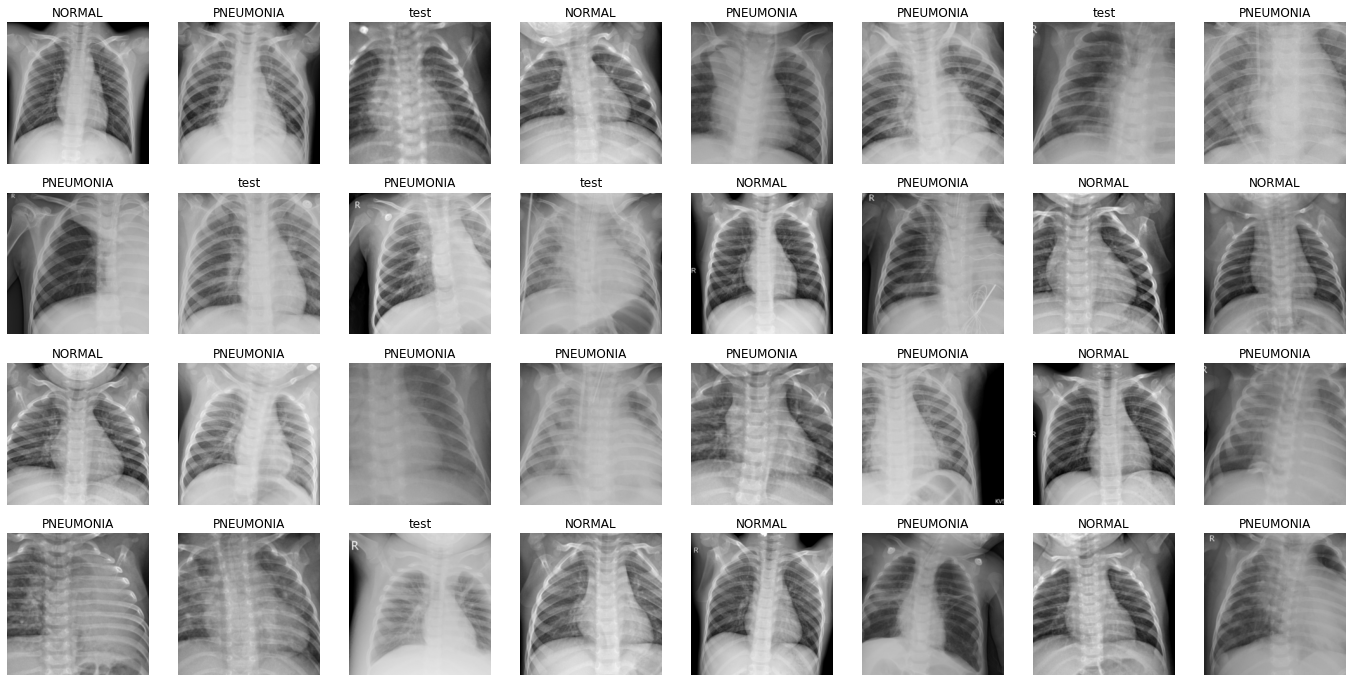

In [7]:
from fastai.vision.all import *
from ipywidgets import widgets

#path
path=Path('/kaggle/input')
fls=get_image_files(path)
pnevmoniya=DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.1,seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)
dls=pnevmoniya.dataloaders(path)
dls.train.show_batch(max_n=32,nrows=4)

#learn
learn=cnn_learner(dls,resnet34,metrics=accuracy)
learn.fine_tune(4)

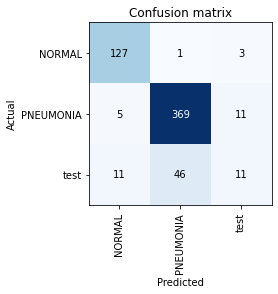

In [12]:
#tekshitish
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [15]:
upload=widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

In [14]:
img=PILImage.create(upload.data[-1])
pred,pred_id,probs=learn.predict(img)
print(f'Bashorat:{pred}')
print(f'Ehtimollik:{probs[pred_id]}')
img

IndexError: list index out of range

In [23]:
from tqdm import tqdm

In [30]:
files = !ls "../input/pnevmoniya/test"
preds = []
numbers = []
for file in tqdm(files):
    number, n_th, probs = learn.predict(f"../input/pnevmoniya/test/{file}")
    preds.append(n_th)
    numbers.append(number)

  0%|          | 0/624 [00:00<?, ?it/s]

  0%|          | 2/624 [00:00<01:06,  9.40it/s]

  1%|          | 4/624 [00:00<00:56, 10.93it/s]

  1%|          | 6/624 [00:00<01:03,  9.77it/s]

  1%|▏         | 8/624 [00:00<00:58, 10.49it/s]

  2%|▏         | 10/624 [00:00<00:59, 10.32it/s]

  2%|▏         | 12/624 [00:01<00:57, 10.68it/s]

  2%|▏         | 14/624 [00:01<00:54, 11.09it/s]

  3%|▎         | 16/624 [00:01<00:54, 11.11it/s]

  3%|▎         | 18/624 [00:01<00:52, 11.64it/s]

  3%|▎         | 20/624 [00:01<00:55, 10.81it/s]

  4%|▎         | 22/624 [00:02<00:55, 10.86it/s]

  4%|▍         | 24/624 [00:02<00:55, 10.85it/s]

  4%|▍         | 26/624 [00:02<00:53, 11.25it/s]

  4%|▍         | 28/624 [00:02<00:54, 11.00it/s]

  5%|▍         | 30/624 [00:02<00:54, 10.87it/s]

  5%|▌         | 32/624 [00:02<00:51, 11.56it/s]

  5%|▌         | 34/624 [00:03<00:49, 12.02it/s]

  6%|▌         | 36/624 [00:03<00:46, 12.59it/s]

  6%|▌         | 38/624 [00:03<00:48, 12.18it/s]

  6%|▋         | 40/624 [00:03<00:48, 11.96it/s]

  7%|▋         | 42/624 [00:03<00:50, 11.60it/s]

  7%|▋         | 44/624 [00:03<00:51, 11.31it/s]

  7%|▋         | 46/624 [00:04<00:51, 11.33it/s]

  8%|▊         | 48/624 [00:04<00:53, 10.72it/s]

  8%|▊         | 50/624 [00:04<00:51, 11.15it/s]

  8%|▊         | 52/624 [00:04<00:56, 10.19it/s]

  9%|▊         | 54/624 [00:04<00:58,  9.75it/s]

  9%|▉         | 55/624 [00:05<00:58,  9.72it/s]

  9%|▉         | 57/624 [00:05<00:53, 10.61it/s]

  9%|▉         | 59/624 [00:05<00:55, 10.20it/s]

 10%|▉         | 61/624 [00:05<00:55, 10.06it/s]

 10%|█         | 63/624 [00:05<00:52, 10.78it/s]

 10%|█         | 65/624 [00:05<00:50, 11.11it/s]

 11%|█         | 67/624 [00:06<00:49, 11.22it/s]

 11%|█         | 69/624 [00:06<00:54, 10.21it/s]

 11%|█▏        | 71/624 [00:06<00:53, 10.30it/s]

 12%|█▏        | 73/624 [00:06<00:51, 10.68it/s]

 12%|█▏        | 75/624 [00:06<00:50, 10.96it/s]

 12%|█▏        | 77/624 [00:07<00:49, 11.02it/s]

 13%|█▎        | 79/624 [00:07<00:46, 11.82it/s]

 13%|█▎        | 81/624 [00:07<00:44, 12.17it/s]

 13%|█▎        | 83/624 [00:07<00:54, 10.01it/s]

 14%|█▎        | 85/624 [00:07<00:55,  9.80it/s]

 14%|█▍        | 87/624 [00:08<00:55,  9.75it/s]

 14%|█▍        | 89/624 [00:08<00:55,  9.58it/s]

 15%|█▍        | 91/624 [00:08<00:50, 10.51it/s]

 15%|█▍        | 93/624 [00:08<00:44, 11.81it/s]

 15%|█▌        | 95/624 [00:08<00:45, 11.67it/s]

 16%|█▌        | 97/624 [00:08<00:48, 10.94it/s]

 16%|█▌        | 99/624 [00:09<00:46, 11.35it/s]

 16%|█▌        | 101/624 [00:09<00:41, 12.49it/s]

 17%|█▋        | 103/624 [00:09<00:41, 12.55it/s]

 17%|█▋        | 105/624 [00:09<00:40, 12.96it/s]

 17%|█▋        | 107/624 [00:09<00:44, 11.68it/s]

 17%|█▋        | 109/624 [00:09<00:46, 11.08it/s]

 18%|█▊        | 111/624 [00:10<00:46, 11.06it/s]

 18%|█▊        | 113/624 [00:10<00:49, 10.30it/s]

 18%|█▊        | 115/624 [00:10<00:48, 10.49it/s]

 19%|█▉        | 117/624 [00:10<00:44, 11.29it/s]

 19%|█▉        | 119/624 [00:10<00:46, 10.86it/s]

 19%|█▉        | 121/624 [00:11<00:46, 10.83it/s]

 20%|█▉        | 123/624 [00:11<00:42, 11.86it/s]

 20%|██        | 125/624 [00:11<00:41, 12.00it/s]

 20%|██        | 127/624 [00:11<00:41, 11.84it/s]

 21%|██        | 129/624 [00:11<00:42, 11.67it/s]

 21%|██        | 131/624 [00:11<00:41, 11.78it/s]

 21%|██▏       | 133/624 [00:11<00:38, 12.65it/s]

 22%|██▏       | 135/624 [00:12<00:40, 12.09it/s]

 22%|██▏       | 137/624 [00:12<00:43, 11.12it/s]

 22%|██▏       | 139/624 [00:12<00:45, 10.62it/s]

 23%|██▎       | 141/624 [00:12<00:44, 10.96it/s]

 23%|██▎       | 143/624 [00:12<00:43, 11.00it/s]

 23%|██▎       | 145/624 [00:13<00:40, 11.92it/s]

 24%|██▎       | 147/624 [00:13<00:40, 11.81it/s]

 24%|██▍       | 149/624 [00:13<00:41, 11.41it/s]

 24%|██▍       | 151/624 [00:13<00:41, 11.41it/s]

 25%|██▍       | 153/624 [00:13<00:39, 11.95it/s]

 25%|██▍       | 155/624 [00:13<00:38, 12.11it/s]

 25%|██▌       | 157/624 [00:14<00:37, 12.43it/s]

 25%|██▌       | 159/624 [00:14<00:37, 12.32it/s]

 26%|██▌       | 161/624 [00:14<00:40, 11.45it/s]

 26%|██▌       | 163/624 [00:14<00:41, 11.16it/s]

 26%|██▋       | 165/624 [00:14<00:40, 11.35it/s]

 27%|██▋       | 167/624 [00:15<00:43, 10.60it/s]

 27%|██▋       | 169/624 [00:15<00:40, 11.15it/s]

 27%|██▋       | 171/624 [00:15<00:38, 11.73it/s]

 28%|██▊       | 173/624 [00:15<00:38, 11.78it/s]

 28%|██▊       | 175/624 [00:15<00:39, 11.43it/s]

 28%|██▊       | 177/624 [00:15<00:39, 11.21it/s]

 29%|██▊       | 179/624 [00:16<00:39, 11.28it/s]

 29%|██▉       | 181/624 [00:16<00:37, 11.95it/s]

 29%|██▉       | 183/624 [00:16<00:36, 11.94it/s]

 30%|██▉       | 185/624 [00:16<00:39, 11.22it/s]

 30%|██▉       | 187/624 [00:16<00:38, 11.47it/s]

 30%|███       | 189/624 [00:16<00:37, 11.70it/s]

 31%|███       | 191/624 [00:17<00:36, 11.92it/s]

 31%|███       | 193/624 [00:17<00:42, 10.18it/s]

 31%|███▏      | 195/624 [00:17<00:41, 10.23it/s]

 32%|███▏      | 197/624 [00:17<00:38, 10.99it/s]

 32%|███▏      | 199/624 [00:17<00:37, 11.29it/s]

 32%|███▏      | 201/624 [00:17<00:36, 11.47it/s]

 33%|███▎      | 203/624 [00:18<00:35, 11.94it/s]

 33%|███▎      | 205/624 [00:18<00:34, 11.98it/s]

 33%|███▎      | 207/624 [00:18<00:39, 10.45it/s]

 33%|███▎      | 209/624 [00:18<00:39, 10.47it/s]

 34%|███▍      | 211/624 [00:19<00:56,  7.34it/s]

 34%|███▍      | 212/624 [00:19<00:58,  7.09it/s]

 34%|███▍      | 213/624 [00:19<01:09,  5.91it/s]

 34%|███▍      | 214/624 [00:19<01:08,  6.00it/s]

 34%|███▍      | 215/624 [00:20<01:21,  5.00it/s]

 35%|███▍      | 216/624 [00:20<01:12,  5.65it/s]

 35%|███▍      | 217/624 [00:20<01:08,  5.95it/s]

 35%|███▌      | 219/624 [00:20<00:54,  7.38it/s]

 35%|███▌      | 221/624 [00:20<00:50,  7.96it/s]

 36%|███▌      | 223/624 [00:20<00:42,  9.42it/s]

 36%|███▌      | 225/624 [00:21<00:38, 10.44it/s]

 36%|███▋      | 227/624 [00:21<00:35, 11.12it/s]

 37%|███▋      | 229/624 [00:21<00:33, 11.94it/s]

 37%|███▋      | 231/624 [00:21<00:35, 11.12it/s]

 37%|███▋      | 233/624 [00:21<00:35, 11.11it/s]

 38%|███▊      | 235/624 [00:21<00:32, 12.15it/s]

 38%|███▊      | 237/624 [00:22<00:34, 11.24it/s]

 38%|███▊      | 239/624 [00:22<00:35, 10.93it/s]

 39%|███▊      | 241/624 [00:22<00:37, 10.22it/s]

 39%|███▉      | 243/624 [00:22<00:36, 10.45it/s]

 39%|███▉      | 245/624 [00:22<00:34, 10.95it/s]

 40%|███▉      | 247/624 [00:23<00:35, 10.68it/s]

 40%|███▉      | 249/624 [00:23<00:38,  9.81it/s]

 40%|████      | 251/624 [00:23<00:35, 10.60it/s]

 41%|████      | 253/624 [00:23<00:33, 11.23it/s]

 41%|████      | 255/624 [00:23<00:31, 11.82it/s]

 41%|████      | 257/624 [00:23<00:30, 12.06it/s]

 42%|████▏     | 259/624 [00:24<00:31, 11.73it/s]

 42%|████▏     | 261/624 [00:24<00:29, 12.41it/s]

 42%|████▏     | 263/624 [00:24<00:28, 12.48it/s]

 42%|████▏     | 265/624 [00:24<00:28, 12.41it/s]

 43%|████▎     | 267/624 [00:24<00:31, 11.30it/s]

 43%|████▎     | 269/624 [00:24<00:31, 11.26it/s]

 43%|████▎     | 271/624 [00:25<00:27, 12.72it/s]

 44%|████▍     | 273/624 [00:25<00:25, 13.86it/s]

 44%|████▍     | 275/624 [00:25<00:24, 14.18it/s]

 44%|████▍     | 277/624 [00:25<00:29, 11.93it/s]

 45%|████▍     | 279/624 [00:25<00:25, 13.30it/s]

 45%|████▌     | 281/624 [00:25<00:24, 13.92it/s]

 45%|████▌     | 283/624 [00:25<00:27, 12.29it/s]

 46%|████▌     | 285/624 [00:26<00:26, 12.85it/s]

 46%|████▌     | 287/624 [00:26<00:29, 11.29it/s]

 46%|████▋     | 289/624 [00:26<00:28, 11.87it/s]

 47%|████▋     | 291/624 [00:26<00:30, 10.99it/s]

 47%|████▋     | 293/624 [00:26<00:29, 11.10it/s]

 47%|████▋     | 295/624 [00:27<00:29, 11.08it/s]

 48%|████▊     | 297/624 [00:27<00:28, 11.50it/s]

 48%|████▊     | 299/624 [00:27<00:26, 12.07it/s]

 48%|████▊     | 301/624 [00:27<00:25, 12.56it/s]

 49%|████▊     | 303/624 [00:27<00:27, 11.64it/s]

 49%|████▉     | 305/624 [00:27<00:25, 12.59it/s]

 49%|████▉     | 307/624 [00:28<00:25, 12.24it/s]

 50%|████▉     | 309/624 [00:28<00:25, 12.31it/s]

 50%|████▉     | 311/624 [00:28<00:27, 11.39it/s]

 50%|█████     | 313/624 [00:28<00:26, 11.73it/s]

 50%|█████     | 315/624 [00:28<00:25, 11.90it/s]

 51%|█████     | 317/624 [00:28<00:24, 12.62it/s]

 51%|█████     | 319/624 [00:29<00:25, 12.18it/s]

 51%|█████▏    | 321/624 [00:29<00:24, 12.46it/s]

 52%|█████▏    | 323/624 [00:29<00:23, 12.86it/s]

 52%|█████▏    | 325/624 [00:29<00:26, 11.41it/s]

 52%|█████▏    | 327/624 [00:29<00:32,  9.12it/s]

 53%|█████▎    | 329/624 [00:30<00:34,  8.46it/s]

 53%|█████▎    | 330/624 [00:30<00:36,  8.10it/s]

 53%|█████▎    | 331/624 [00:30<00:35,  8.16it/s]

 53%|█████▎    | 332/624 [00:30<00:34,  8.40it/s]

 54%|█████▎    | 334/624 [00:30<00:34,  8.31it/s]

 54%|█████▎    | 335/624 [00:30<00:34,  8.46it/s]

 54%|█████▍    | 337/624 [00:31<00:30,  9.55it/s]

 54%|█████▍    | 339/624 [00:31<00:27, 10.40it/s]

 55%|█████▍    | 341/624 [00:31<00:28,  9.78it/s]

 55%|█████▍    | 342/624 [00:31<00:28,  9.76it/s]

 55%|█████▌    | 344/624 [00:31<00:28,  9.83it/s]

 55%|█████▌    | 346/624 [00:31<00:26, 10.59it/s]

 56%|█████▌    | 348/624 [00:32<00:24, 11.05it/s]

 56%|█████▌    | 350/624 [00:32<00:23, 11.87it/s]

 56%|█████▋    | 352/624 [00:32<00:23, 11.44it/s]

 57%|█████▋    | 354/624 [00:32<00:23, 11.59it/s]

 57%|█████▋    | 356/624 [00:32<00:21, 12.26it/s]

 57%|█████▋    | 358/624 [00:32<00:22, 11.89it/s]

 58%|█████▊    | 360/624 [00:33<00:24, 10.86it/s]

 58%|█████▊    | 362/624 [00:33<00:22, 11.49it/s]

 58%|█████▊    | 364/624 [00:33<00:21, 11.92it/s]

 59%|█████▊    | 366/624 [00:33<00:20, 12.35it/s]

 59%|█████▉    | 368/624 [00:33<00:20, 12.72it/s]

 59%|█████▉    | 370/624 [00:33<00:21, 11.90it/s]

 60%|█████▉    | 372/624 [00:34<00:21, 11.69it/s]

 60%|█████▉    | 374/624 [00:34<00:20, 11.94it/s]

 60%|██████    | 376/624 [00:34<00:20, 11.85it/s]

 61%|██████    | 378/624 [00:34<00:20, 11.97it/s]

 61%|██████    | 380/624 [00:34<00:23, 10.36it/s]

 61%|██████    | 382/624 [00:34<00:22, 10.64it/s]

 62%|██████▏   | 384/624 [00:35<00:21, 11.21it/s]

 62%|██████▏   | 386/624 [00:35<00:21, 10.97it/s]

 62%|██████▏   | 388/624 [00:35<00:21, 11.11it/s]

 62%|██████▎   | 390/624 [00:35<00:19, 11.83it/s]

 63%|██████▎   | 392/624 [00:35<00:20, 11.45it/s]

 63%|██████▎   | 394/624 [00:35<00:19, 11.66it/s]

 63%|██████▎   | 396/624 [00:36<00:18, 12.16it/s]

 64%|██████▍   | 398/624 [00:36<00:18, 12.08it/s]

 64%|██████▍   | 400/624 [00:36<00:20, 10.96it/s]

 64%|██████▍   | 402/624 [00:36<00:19, 11.27it/s]

 65%|██████▍   | 404/624 [00:36<00:19, 11.35it/s]

 65%|██████▌   | 406/624 [00:37<00:19, 11.02it/s]

 65%|██████▌   | 408/624 [00:37<00:18, 11.42it/s]

 66%|██████▌   | 410/624 [00:37<00:18, 11.64it/s]

 66%|██████▌   | 412/624 [00:37<00:16, 12.49it/s]

 66%|██████▋   | 414/624 [00:37<00:15, 13.22it/s]

 67%|██████▋   | 416/624 [00:37<00:14, 13.90it/s]

 67%|██████▋   | 418/624 [00:37<00:15, 13.10it/s]

 67%|██████▋   | 420/624 [00:38<00:15, 13.48it/s]

 68%|██████▊   | 422/624 [00:38<00:14, 13.79it/s]

 68%|██████▊   | 424/624 [00:38<00:14, 13.85it/s]

 68%|██████▊   | 426/624 [00:38<00:14, 13.94it/s]

 69%|██████▊   | 428/624 [00:38<00:14, 13.51it/s]

 69%|██████▉   | 430/624 [00:38<00:14, 13.59it/s]

 69%|██████▉   | 432/624 [00:39<00:15, 12.67it/s]

 70%|██████▉   | 434/624 [00:39<00:14, 13.22it/s]

 70%|██████▉   | 436/624 [00:39<00:14, 13.39it/s]

 70%|███████   | 438/624 [00:39<00:14, 13.12it/s]

 71%|███████   | 440/624 [00:39<00:13, 13.58it/s]

 71%|███████   | 442/624 [00:39<00:13, 13.81it/s]

 71%|███████   | 444/624 [00:39<00:14, 12.24it/s]

 71%|███████▏  | 446/624 [00:40<00:13, 12.80it/s]

 72%|███████▏  | 448/624 [00:40<00:13, 13.49it/s]

 72%|███████▏  | 450/624 [00:40<00:12, 13.77it/s]

 72%|███████▏  | 452/624 [00:40<00:13, 13.22it/s]

 73%|███████▎  | 454/624 [00:40<00:15, 11.02it/s]

 73%|███████▎  | 456/624 [00:41<00:17,  9.82it/s]

 73%|███████▎  | 458/624 [00:41<00:17,  9.39it/s]

 74%|███████▎  | 460/624 [00:41<00:15, 10.81it/s]

 74%|███████▍  | 462/624 [00:41<00:13, 11.96it/s]

 74%|███████▍  | 464/624 [00:41<00:12, 12.56it/s]

 75%|███████▍  | 466/624 [00:41<00:11, 13.38it/s]

 75%|███████▌  | 468/624 [00:41<00:12, 12.80it/s]

 75%|███████▌  | 470/624 [00:42<00:11, 13.36it/s]

 76%|███████▌  | 472/624 [00:42<00:11, 13.62it/s]

 76%|███████▌  | 474/624 [00:42<00:11, 13.30it/s]

 76%|███████▋  | 476/624 [00:42<00:11, 13.45it/s]

 77%|███████▋  | 478/624 [00:42<00:10, 13.84it/s]

 77%|███████▋  | 480/624 [00:42<00:10, 13.97it/s]

 77%|███████▋  | 482/624 [00:42<00:10, 14.04it/s]

 78%|███████▊  | 484/624 [00:43<00:09, 14.11it/s]

 78%|███████▊  | 486/624 [00:43<00:09, 14.32it/s]

 78%|███████▊  | 488/624 [00:43<00:09, 13.89it/s]

 79%|███████▊  | 490/624 [00:43<00:09, 13.79it/s]

 79%|███████▉  | 492/624 [00:43<00:10, 12.12it/s]

 79%|███████▉  | 494/624 [00:43<00:10, 12.97it/s]

 79%|███████▉  | 496/624 [00:43<00:09, 13.65it/s]

 80%|███████▉  | 498/624 [00:44<00:08, 14.04it/s]

 80%|████████  | 500/624 [00:44<00:08, 14.24it/s]

 80%|████████  | 502/624 [00:44<00:08, 14.21it/s]

 81%|████████  | 504/624 [00:44<00:08, 13.72it/s]

 81%|████████  | 506/624 [00:44<00:08, 13.82it/s]

 81%|████████▏ | 508/624 [00:44<00:08, 14.01it/s]

 82%|████████▏ | 510/624 [00:44<00:08, 14.20it/s]

 82%|████████▏ | 512/624 [00:45<00:07, 14.22it/s]

 82%|████████▏ | 514/624 [00:45<00:07, 14.21it/s]

 83%|████████▎ | 516/624 [00:45<00:07, 14.02it/s]

 83%|████████▎ | 518/624 [00:45<00:07, 14.24it/s]

 83%|████████▎ | 520/624 [00:45<00:07, 14.35it/s]

 84%|████████▎ | 522/624 [00:45<00:07, 13.64it/s]

 84%|████████▍ | 524/624 [00:45<00:07, 13.69it/s]

 84%|████████▍ | 526/624 [00:46<00:07, 13.84it/s]

 85%|████████▍ | 528/624 [00:46<00:07, 13.49it/s]

 85%|████████▍ | 530/624 [00:46<00:06, 13.86it/s]

 85%|████████▌ | 532/624 [00:46<00:06, 13.97it/s]

 86%|████████▌ | 534/624 [00:46<00:06, 13.78it/s]

 86%|████████▌ | 536/624 [00:46<00:06, 13.66it/s]

 86%|████████▌ | 538/624 [00:46<00:06, 13.33it/s]

 87%|████████▋ | 540/624 [00:47<00:06, 12.83it/s]

 87%|████████▋ | 542/624 [00:47<00:06, 13.20it/s]

 87%|████████▋ | 544/624 [00:47<00:06, 13.26it/s]

 88%|████████▊ | 546/624 [00:47<00:05, 13.80it/s]

 88%|████████▊ | 548/624 [00:47<00:05, 13.81it/s]

 88%|████████▊ | 550/624 [00:47<00:05, 13.89it/s]

 88%|████████▊ | 552/624 [00:48<00:05, 13.62it/s]

 89%|████████▉ | 554/624 [00:48<00:05, 13.20it/s]

 89%|████████▉ | 556/624 [00:48<00:05, 12.91it/s]

 89%|████████▉ | 558/624 [00:48<00:05, 12.61it/s]

 90%|████████▉ | 560/624 [00:48<00:05, 12.40it/s]

 90%|█████████ | 562/624 [00:48<00:04, 12.45it/s]

 90%|█████████ | 564/624 [00:48<00:04, 13.01it/s]

 91%|█████████ | 566/624 [00:49<00:04, 13.32it/s]

 91%|█████████ | 568/624 [00:49<00:04, 13.54it/s]

 91%|█████████▏| 570/624 [00:49<00:03, 13.71it/s]

 92%|█████████▏| 572/624 [00:49<00:03, 13.73it/s]

 92%|█████████▏| 574/624 [00:49<00:03, 14.13it/s]

 92%|█████████▏| 576/624 [00:49<00:03, 14.18it/s]

 93%|█████████▎| 578/624 [00:49<00:03, 13.68it/s]

 93%|█████████▎| 580/624 [00:50<00:03, 13.70it/s]

 93%|█████████▎| 582/624 [00:50<00:02, 14.27it/s]

 94%|█████████▎| 584/624 [00:50<00:02, 14.64it/s]

 94%|█████████▍| 586/624 [00:50<00:02, 13.51it/s]

 94%|█████████▍| 588/624 [00:50<00:03, 11.20it/s]

 95%|█████████▍| 590/624 [00:51<00:03,  9.54it/s]

 95%|█████████▍| 592/624 [00:51<00:03,  9.07it/s]

 95%|█████████▌| 593/624 [00:51<00:03,  9.12it/s]

 95%|█████████▌| 594/624 [00:51<00:03,  8.66it/s]

 95%|█████████▌| 595/624 [00:51<00:03,  7.26it/s]

 96%|█████████▌| 596/624 [00:51<00:04,  6.87it/s]

 96%|█████████▌| 597/624 [00:52<00:04,  6.65it/s]

 96%|█████████▌| 598/624 [00:52<00:03,  7.24it/s]

 96%|█████████▌| 599/624 [00:52<00:03,  7.02it/s]

 96%|█████████▌| 600/624 [00:52<00:03,  7.30it/s]

 96%|█████████▋| 601/624 [00:52<00:04,  5.70it/s]

 97%|█████████▋| 603/624 [00:52<00:02,  7.07it/s]

 97%|█████████▋| 604/624 [00:53<00:03,  6.65it/s]

 97%|█████████▋| 606/624 [00:53<00:02,  8.18it/s]

 97%|█████████▋| 608/624 [00:53<00:01,  9.09it/s]

 98%|█████████▊| 610/624 [00:53<00:01,  9.38it/s]

 98%|█████████▊| 612/624 [00:53<00:01,  9.86it/s]

 98%|█████████▊| 614/624 [00:54<00:00, 10.87it/s]

 99%|█████████▊| 616/624 [00:54<00:00, 11.85it/s]

 99%|█████████▉| 618/624 [00:54<00:00, 11.50it/s]

 99%|█████████▉| 620/624 [00:54<00:00, 12.36it/s]

100%|█████████▉| 622/624 [00:54<00:00, 11.86it/s]

100%|██████████| 624/624 [00:54<00:00, 11.39it/s]


In [31]:
predict = []
for num in numbers:
    if num == 'NORMAL':
        predict.append(0)
    elif num == 'PNEUMONIA':
        predict.append(1)

In [35]:
len(predict)

360

In [32]:
df = pd.read_csv('../input/pnevmoniya/sample_solution.csv')
df

,id,labels
0,test_img_10001.jpeg,0
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,0
3,test_img_10004.jpeg,0
4,test_img_10005.jpeg,0
...,...,...
619,test_img_10620.jpeg,0
620,test_img_10621.jpeg,0
621,test_img_10622.jpeg,0
622,test_img_10623.jpeg,0


In [33]:
df['labels']=predict
df.head()

ValueError: Length of values (360) does not match length of index (624)

In [34]:
df.to_csv('pnevmoniya3.2.csv', index=False)